# **INDIAI - ARTIFICIAL INTELLIGENCE PROJECT**


##### **Group :** `Manav THONTIA`     |   `Delfina FERRERI`    |  `Mathis VESCHAMBRE`  |   `Shiva TARDIVEL`

***

# INTRODUCTION

- *Context of the project*
- *Context of the problem*
- *We will be working with five sources of data in csv format...*
- *General stages of the project*

***

# DATA PREPROCESSING
- *General steps to follow*
- *Setting the environment*
- *Short description of libraries to be used*

In [1190]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os

## Loading the DataSets

In [1191]:
# os.chdir("Change this to the relative/absolute path of the Datasets folder")
os.chdir("./Datasets")

general_data = pd.read_csv('general_data.csv').copy()
employee_survey_data = pd.read_csv('employee_survey_data.csv').copy()
manager_survey_data = pd.read_csv('manager_survey_data.csv').copy()
in_time = pd.read_csv('in_time.csv').copy()
out_time = pd.read_csv('out_time.csv').copy()

os.chdir("..")

The datasets will be processed separately, then once clean thet'll be merged into one.

## Before merging all in one

### General Data

In [1192]:
general_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 24 entries, Age to YearsWithCurrManager
dtypes: float64(2), int64(14), object(8)
memory usage: 827.0+ KB


What can be observed from general data so far?
- Data from 4410 employees was gathered.
- Most of the attributes -exactly 14- are numerical, accepting either integers or floats as values.
- The other 5 attributes seem to be categorical.

Let's take a look at what the general data looks like:

In [1193]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


#### Dropping unnecesary attributes

Just by looking, we notice that:
- The attribute **Over18** is redundant: the more precise attribute **Age** is also present.
- The attribute **EmployeeCount** makes no sense, as each entry represents only one employee.
- We can divise two attributes that represent sensitive personal information, like **Gender** and **MaritalStatus**. We don't consider these relevant for the current analysis.

Let's now look at the metrics for each numerical attribute.

In [1194]:
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


- The attributes **EmployeeCount** and **StandardHours** have a standard deviation of 0.0, meaning that, for them, all entries have the same value -which are 1 and 8.0 respectively-. They are not useful to tell employees apart in any way.

We proceed by dropping the mentioned attributes, reducing the number of columns from 24 to 19.

In [1195]:
general_data.drop('Gender', axis=1,inplace=True)
general_data.drop('MaritalStatus', axis=1,inplace=True)
general_data.drop('Over18', axis=1,inplace=True)
general_data.drop('EmployeeCount', axis=1,inplace=True)
general_data.drop('StandardHours', axis=1,inplace=True)
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,60290,3.0,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,26790,2.0,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,37020,0.0,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,23980,0.0,14,1,10.0,2,9,7,8


### Survey Data: Employee and Manager

These datasets contain information about the employee's feelings and performance at work, both from it's point of view and from the point of view of its manager. At first sight, all attributes seem like they could be relevant for the current analysis.

In [1196]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [1197]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Given their similarity, it seems natural to merge these two into one dataset, using **EmployeeID** as the key attribute.

In [1198]:
survey_data = pd.merge(employee_survey_data,manager_survey_data,on="EmployeeID",how="outer")
survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,3,3
1,2,3.0,2.0,4.0,2,4
2,3,2.0,2.0,1.0,3,3
3,4,4.0,4.0,3.0,2,3
4,5,4.0,1.0,3.0,3,3


In [1199]:
survey_data.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000,4.000000,4.000000


### Schedule Data: In and Out Times

These datasets contain extremely detailed information on the times of entry and exit of each employee during the last 250 week-days.

Extra processing will be needed for these two sets of data, as this information on its own is not useful yet.

What new attributes for each employee could we extract from here?
- **Average of hours worked per day** (without taking into consideration those days when the employee was absent)
- **Number of absences** (days where there is no recorded time for entry and exit of the employee)
- **Schedule inconsistency** (how much the amount of hours worked each day varies, standard deviation for working hours)

But first, small peek at what the data looks like:

In [1200]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [1201]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


#### Dropping unnecesary attributes

- Some days seem to have N/A values for all employees! Among these, the first day of the year and Christmas.

- These non-workable days are not relevant for our analysis, as they don't provide information to tell employees apart.

- We proceed by identifying them and dropping the columns that match our description.

In [1202]:
nonsence_entries_in = pd.DataFrame(in_time.loc[:, in_time.isnull().sum() == len(in_time) ])
print(nonsence_entries_in.shape[1]," days with all null values for time of entrance.")
nonsence_entries_in

12  days with all null values for time of entrance.


,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1203]:
nonsence_entries_out = pd.DataFrame(out_time.loc[:, in_time.isnull().sum() == len(in_time)])
print(nonsence_entries_out.shape[1]," days with all null values for time of exit.")
nonsence_entries_out

12  days with all null values for time of exit.


,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is interesting to verify if the dates of non-workable days are consistent, meaning in time and out time data are well synchronized.

In [1204]:
print("The non-workable days in in_data are the same as in out_data?: ",nonsence_entries_in.equals(nonsence_entries_out))

The non-workable days in in_data are the same as in out_data?:  True


In [1205]:
in_time = in_time.drop(columns=nonsence_entries_in.columns)
out_time = out_time.drop(columns=nonsence_entries_out.columns)

By retiring the non-workable days, we reduced the columns with missing values by 12. Now let's look at other cases of this phenomena.

#### Treatment of missing values

Before acting on missing values, a function to quickly detect them:

In [1206]:
def DisplayMissingValues(data, data_name):
    
    df = pd.DataFrame(data)

    missing_counts = df.isnull().sum()
    missing_columns = missing_counts[missing_counts > 0]
    
    if missing_columns.empty:
        print("[0] No missing values in:",data_name,"\n")
        return
    print(len(missing_columns)," attributes with missing values in: ",data_name)
    print(missing_columns.to_string(),"\n")

In [1207]:
DisplayMissingValues(in_time, "in time")

249  attributes with missing values in:  in time
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
2015-01-08    243
2015-01-09    215
2015-01-12    239
2015-01-13    265
2015-01-15    236
2015-01-16    264
2015-01-19    228
2015-01-20    241
2015-01-21    240
2015-01-22    240
2015-01-23    249
2015-01-27    217
2015-01-28    212
2015-01-29    276
2015-01-30    208
2015-02-02    208
2015-02-03    206
2015-02-04    212
2015-02-05    211
2015-02-06    211
2015-02-09    224
2015-02-10    219
2015-02-11    226
2015-02-12    236
2015-02-13    212
2015-02-16    222
2015-02-17    244
2015-02-18    229
2015-02-19    217
2015-02-20    212
2015-02-23    241
2015-02-24    226
2015-02-25    234
2015-02-26    238
2015-02-27    236
2015-03-02    254
2015-03-03    228
2015-03-04    231
2015-03-06    242
2015-03-09    232
2015-03-10    243
2015-03-11    232
2015-03-12    219
2015-03-13    191
2015-03-16    219
2015-03-17    231
2015-03-18    237
2015-03-19    239
2015-03-20    2

In [1208]:

DisplayMissingValues(out_time, "out time")

249  attributes with missing values in:  out time
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
2015-01-08    243
2015-01-09    215
2015-01-12    239
2015-01-13    265
2015-01-15    236
2015-01-16    264
2015-01-19    228
2015-01-20    241
2015-01-21    240
2015-01-22    240
2015-01-23    249
2015-01-27    217
2015-01-28    212
2015-01-29    276
2015-01-30    208
2015-02-02    208
2015-02-03    206
2015-02-04    212
2015-02-05    211
2015-02-06    211
2015-02-09    224
2015-02-10    219
2015-02-11    226
2015-02-12    236
2015-02-13    212
2015-02-16    222
2015-02-17    244
2015-02-18    229
2015-02-19    217
2015-02-20    212
2015-02-23    241
2015-02-24    226
2015-02-25    234
2015-02-26    238
2015-02-27    236
2015-03-02    254
2015-03-03    228
2015-03-04    231
2015-03-06    242
2015-03-09    232
2015-03-10    243
2015-03-11    232
2015-03-12    219
2015-03-13    191
2015-03-16    219
2015-03-17    231
2015-03-18    237
2015-03-19    239
2015-03-20    

Too many missing values!
A treatment protocol must be chosen.

First, let's verify there are no _inconsistencies_ in the missing values. 

What do we mean by inconsistencies? Days where, for certain employee, either entry time or exit time is missing, but not both at the same time.
An occurrence of this kind would be a problem, as it would clearly not make sense for an employee to get in and then never get out, or viceversa.

In [1209]:
null_inconsistency_df = in_time.isnull() ^ out_time.isnull()    # XOR operation for each cell
print("The number of null inconsistencies is: ",(null_inconsistency_df == True).sum().sum())    # Counting inconsistencies

The number of null inconsistencies is:  0


No inconsistencies. This means in time and out time data are well synchronized.

Then for the days both entry and exit time are missing -which, as we have just observed, happens at least once for each recorded day- the decision to take it as an absent day, with zero hours of work, was taken. 

It's unknown to us the reason why the employee didn't attend work that day, so a neutral enough name was picked for this new attribute: **TotalAbsences**.

In [1210]:
def hours_since_midnight(input_time):
    return input_time.hour + input_time.minute / 60

In [1211]:
# convert to datetime format
first_column = in_time['Unnamed: 0']
in_time = in_time.apply(pd.to_datetime)
in_time = in_time.applymap(hours_since_midnight) 

# recover the first column
in_time.insert(0,"EmployeeID",first_column)
in_time.pop('Unnamed: 0')

in_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_46879/141373452.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  in_time = in_time.applymap(hours_since_midnight)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,9.716667,10.133333,9.900000,9.566667,9.850000,10.150000,9.700000,10.216667,10.016667,...,NaN,NaN,9.916667,10.066667,10.233333,10.183333,10.216667,10.050000,9.900000,10.200000
1,2,10.250000,10.350000,NaN,9.750000,10.150000,9.716667,10.000000,10.716667,9.616667,...,9.250000,10.616667,9.816667,10.550000,10.200000,NaN,9.516667,9.916667,10.533333,9.450000
2,3,10.283333,9.833333,10.233333,9.783333,10.050000,10.083333,10.050000,10.350000,9.916667,...,9.883333,10.250000,10.166667,9.733333,10.250000,10.116667,9.700000,9.716667,9.566667,10.466667
3,4,10.083333,9.933333,10.183333,9.616667,10.033333,10.133333,10.216667,9.883333,10.000000,...,9.900000,10.283333,9.966667,10.066667,10.183333,9.716667,9.866667,9.550000,10.300000,10.016667
4,5,10.466667,9.816667,9.750000,9.816667,10.316667,10.000000,10.483333,9.983333,10.100000,...,9.766667,9.966667,10.050000,10.166667,10.216667,9.733333,10.083333,10.500000,9.300000,9.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,9.333333,10.283333,10.433333,10.100000,9.750000,9.816667,9.616667,9.416667,9.483333,...,10.083333,10.016667,10.416667,10.266667,10.066667,9.750000,10.250000,10.166667,9.466667,10.000000
4406,4407,10.050000,NaN,9.733333,9.700000,10.000000,9.733333,10.116667,10.083333,10.300000,...,9.750000,9.450000,9.683333,9.833333,10.533333,9.783333,9.900000,10.216667,10.350000,10.150000
4407,4408,10.016667,9.550000,9.816667,10.466667,9.783333,10.016667,9.816667,9.783333,10.133333,...,10.016667,10.000000,9.850000,10.033333,9.966667,9.933333,9.983333,NaN,10.033333,10.050000
4408,4409,10.283333,10.033333,10.200000,10.200000,9.700000,NaN,10.000000,9.800000,9.066667,...,9.850000,9.900000,10.016667,10.166667,9.700000,9.933333,9.916667,9.900000,10.250000,9.933333


In [1212]:
first_column = out_time['Unnamed: 0']
out_time = out_time.apply(pd.to_datetime)
out_time = out_time.applymap(hours_since_midnight) 

out_time.insert(0,"EmployeeID",first_column)
out_time.pop('Unnamed: 0')

out_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_46879/382984850.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  out_time = out_time.applymap(hours_since_midnight)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16.933333,17.333333,17.316667,16.566667,17.133333,17.633333,16.966667,18.033333,17.366667,...,NaN,NaN,17.250000,17.450000,16.733333,17.783333,18.000000,17.366667,17.666667,17.283333
1,2,18.366667,17.800000,NaN,17.150000,17.566667,16.866667,17.600000,18.000000,17.233333,...,17.166667,18.516667,17.566667,18.266667,17.633333,NaN,17.133333,17.900000,18.516667,17.666667
2,3,16.983333,17.100000,16.633333,16.550000,17.400000,16.950000,17.466667,17.350000,17.350000,...,17.100000,17.033333,17.333333,16.533333,16.983333,16.966667,16.716667,17.150000,17.100000,17.250000
3,4,17.416667,17.233333,17.116667,16.533333,16.883333,17.316667,17.216667,17.183333,16.883333,...,17.350000,17.916667,16.816667,17.400000,17.600000,16.800000,17.316667,16.966667,17.666667,17.150000
4,5,18.516667,17.816667,17.433333,17.616667,17.983333,17.733333,18.850000,18.233333,18.350000,...,18.083333,17.866667,17.716667,18.116667,18.000000,17.983333,17.733333,18.783333,17.250000,17.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,17.450000,19.133333,18.833333,18.950000,17.966667,18.100000,17.966667,18.166667,17.833333,...,18.583333,18.100000,18.583333,18.550000,18.666667,18.350000,18.733333,19.233333,18.400000,18.500000
4406,4407,16.316667,NaN,15.116667,15.416667,16.200000,15.433333,16.166667,16.366667,16.316667,...,15.733333,15.383333,15.516667,15.750000,16.633333,15.783333,15.566667,16.783333,16.050000,16.300000
4407,4408,17.283333,17.133333,17.450000,18.450000,17.083333,17.033333,17.583333,17.250000,18.250000,...,17.700000,17.800000,17.716667,17.783333,17.716667,17.333333,17.716667,NaN,17.800000,18.133333
4408,4409,19.800000,19.616667,20.000000,19.583333,18.916667,NaN,19.300000,19.400000,18.550000,...,19.100000,19.866667,19.350000,19.533333,18.950000,19.616667,19.966667,18.916667,19.616667,19.550000


In [1213]:
def nan_to_zero(value):
    if pd.isna(value):
        value = 0
    return value

In [1214]:
in_time = in_time.applymap(nan_to_zero)
in_time

out_time = out_time.applymap(nan_to_zero)
out_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_46879/51485806.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  in_time = in_time.applymap(nan_to_zero)
/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_46879/51485806.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  out_time = out_time.applymap(nan_to_zero)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16.933333,17.333333,17.316667,16.566667,17.133333,17.633333,16.966667,18.033333,17.366667,...,0.000000,0.000000,17.250000,17.450000,16.733333,17.783333,18.000000,17.366667,17.666667,17.283333
1,2,18.366667,17.800000,0.000000,17.150000,17.566667,16.866667,17.600000,18.000000,17.233333,...,17.166667,18.516667,17.566667,18.266667,17.633333,0.000000,17.133333,17.900000,18.516667,17.666667
2,3,16.983333,17.100000,16.633333,16.550000,17.400000,16.950000,17.466667,17.350000,17.350000,...,17.100000,17.033333,17.333333,16.533333,16.983333,16.966667,16.716667,17.150000,17.100000,17.250000
3,4,17.416667,17.233333,17.116667,16.533333,16.883333,17.316667,17.216667,17.183333,16.883333,...,17.350000,17.916667,16.816667,17.400000,17.600000,16.800000,17.316667,16.966667,17.666667,17.150000
4,5,18.516667,17.816667,17.433333,17.616667,17.983333,17.733333,18.850000,18.233333,18.350000,...,18.083333,17.866667,17.716667,18.116667,18.000000,17.983333,17.733333,18.783333,17.250000,17.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,17.450000,19.133333,18.833333,18.950000,17.966667,18.100000,17.966667,18.166667,17.833333,...,18.583333,18.100000,18.583333,18.550000,18.666667,18.350000,18.733333,19.233333,18.400000,18.500000
4406,4407,16.316667,0.000000,15.116667,15.416667,16.200000,15.433333,16.166667,16.366667,16.316667,...,15.733333,15.383333,15.516667,15.750000,16.633333,15.783333,15.566667,16.783333,16.050000,16.300000
4407,4408,17.283333,17.133333,17.450000,18.450000,17.083333,17.033333,17.583333,17.250000,18.250000,...,17.700000,17.800000,17.716667,17.783333,17.716667,17.333333,17.716667,0.000000,17.800000,18.133333
4408,4409,19.800000,19.616667,20.000000,19.583333,18.916667,0.000000,19.300000,19.400000,18.550000,...,19.100000,19.866667,19.350000,19.533333,18.950000,19.616667,19.966667,18.916667,19.616667,19.550000


Now the two will be combined into one dataset containing the previously mentionned attributes, and using **EmployeeID** as the key.

In [1215]:

##

time_data = pd.DataFrame(index=in_time.index, columns=['EmployeeID','AvgWorkedHours','ScheduleInconsistency','Absences'])

# Function to calculate mean time in hours
def calculate_working_hours(e_id,row_in,row_out):

    working_hours_for_employee = []
    absence_counter = 0
    for index in range(1,len(in_time.columns)):    # Skipping EmployeeID column
        check_in = row_in.iloc[index]
        check_out = row_out.iloc[index]
        hours_worked = (check_out - check_in)
        if (hours_worked == 0):
            absence_counter+=1
        else:
            working_hours_for_employee.append(hours_worked)
    mean_time = np.mean(working_hours_for_employee)
    std = np.std(working_hours_for_employee)
    return e_id, mean_time, std, absence_counter



# add new attributes
for i in range(0,len(in_time)):
    row_in = in_time.iloc[i]
    row_out = out_time.iloc[i]

    # Call the function and unpack the results
    e_id, mean_time, schedule_inconsistency, absence_counter = calculate_working_hours(i, row_in, row_out)
    #print(e_id)
    # Assign the results to the new DataFrame 'time_data'
    pos = i
    time_data.at[pos, 'EmployeeID'] = e_id
    time_data.at[pos, 'AvgWorkedHours'] = mean_time
    time_data.at[pos, 'ScheduleInconsistency'] = schedule_inconsistency
    time_data.at[pos, 'Absences'] = absence_counter


In [1216]:
time_data.head()

,EmployeeID,AvgWorkedHours,ScheduleInconsistency,Absences
0,0,7.374138,0.281756,17
1,1,7.717726,0.312333,13
2,2,7.013499,0.310978,7
3,3,7.193475,0.283085,14
4,4,8.006259,0.30018,4


In [ ]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             4410 non-null   object
 1   AvgWorkedHours         4410 non-null   object
 2   ScheduleInconsistency  4410 non-null   object
 3   Absences               4410 non-null   object
dtypes: object(4)
memory usage: 137.9+ KB


No missing values, as we previously replaced all occurrences of NaN.

In [ ]:
time_data.describe()
print("MIN: ",time_data['AvgWorkedHours'].min())
print("MAX: ",time_data['AvgWorkedHours'].max())
print("AVG: ",time_data['AvgWorkedHours'].mean())
print("STD: ",time_data['AvgWorkedHours'].std())

MIN:  5.950881057268722
MAX:  11.031410256410256
AVG:  7.700784836238567
STD:  1.3402092792425775


In [ ]:
sorted_time_data = time_data['AvgWorkedHours'].sort_values()
#time_data.sort_index(axis=0,ascending=True,)
sorted_time_data

2084     5.950881
987      5.951206
941      5.957383
1257     5.962373
904      5.965903
          ...    
3600    11.016384
1487    11.019269
2968    11.020815
2120    11.025641
650      11.03141
Name: AvgWorkedHours, Length: 4410, dtype: object

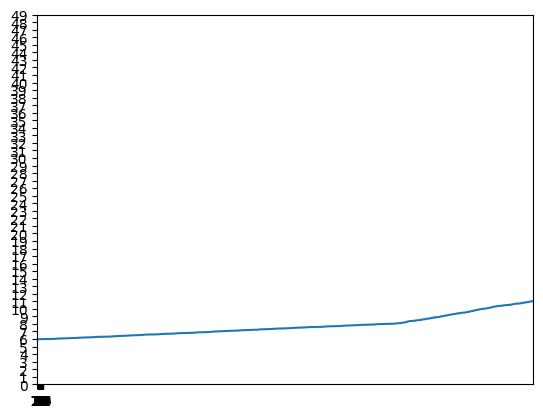

In [ ]:
#plt.style.use('_mpl-gallery')

# make the data
x = [i for i in range (0,4410)]
y = sorted_time_data
# size and color:
sizes = 2

# plot
fig, ax = plt.subplots()

ax.plot(x, y)

ax.set(ylim=(time_data['AvgWorkedHours'].min(), time_data['AvgWorkedHours'].max()), xticks=np.arange(0, 50),
       xlim=(0, 4412), yticks=np.arange(0, 50))

plt.show()

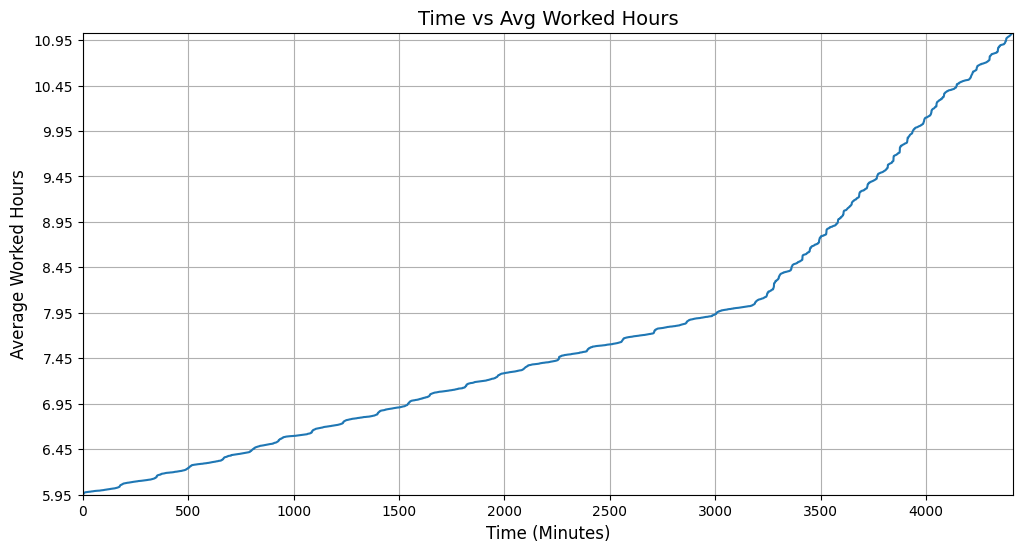

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = [i for i in range(0, 4410)]
y = sorted_time_data  # assuming this is your y data (replace with actual data)

# Create a figure and axis with a larger size
fig, ax = plt.subplots(figsize=(12, 6))  # Bigger plot, change dimensions if needed

# Plot the data
ax.plot(x, y)

# Set the limits and ticks
ax.set(ylim=(time_data['AvgWorkedHours'].min(), time_data['AvgWorkedHours'].max()),
       xlim=(0, 4412))

# Auto-generate tick values
ax.set_xticks(np.arange(0, 4412, 500))  # X ticks with a step of 500 (adjust based on data)
ax.set_yticks(np.arange(time_data['AvgWorkedHours'].min(), time_data['AvgWorkedHours'].max(), 0.5))  # Adjust Y ticks step

# Add gridlines
ax.grid(True)

# Add labels and title for clarity
ax.set_xlabel('Time (Minutes)', fontsize=12)
ax.set_ylabel('Average Worked Hours', fontsize=12)
ax.set_title('Time vs Avg Worked Hours', fontsize=14)

# Show the plot
plt.show()


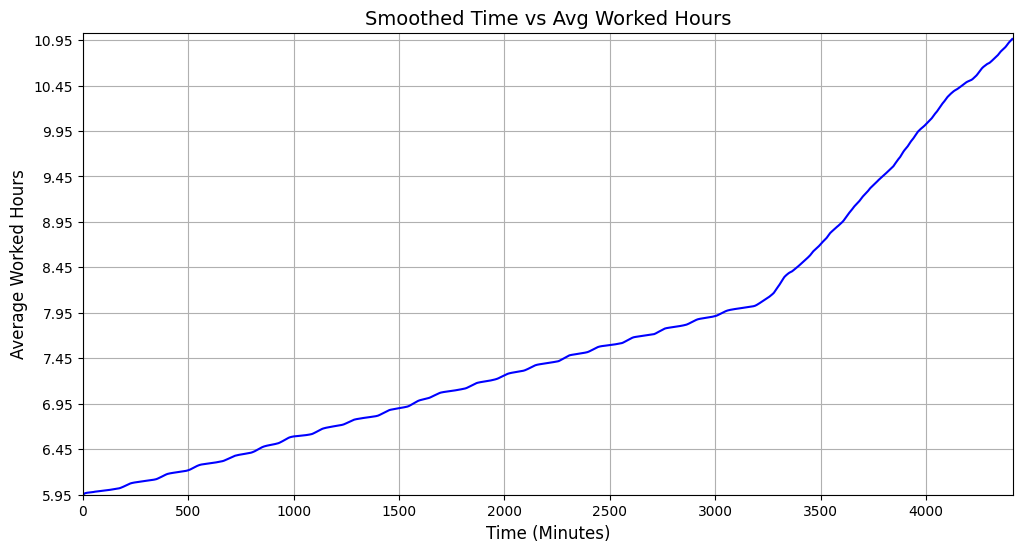

In [ ]:
import pandas as pd

# Assuming y is your original data
window_size = 50  # Choose a window size based on your data
smoothed_y = pd.Series(y).rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed data
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, smoothed_y, label='Smoothed Data', color='blue')

ax.set(ylim=(time_data['AvgWorkedHours'].min(), time_data['AvgWorkedHours'].max()),
       xlim=(0, 4412))

# Auto-generate tick values
ax.set_xticks(np.arange(0, 4412, 500))
ax.set_yticks(np.arange(time_data['AvgWorkedHours'].min(), time_data['AvgWorkedHours'].max(), 0.5))

# Add gridlines
ax.grid(True)

# Add labels and title for clarity
ax.set_xlabel('Time (Minutes)', fontsize=12)
ax.set_ylabel('Average Worked Hours', fontsize=12)
ax.set_title('Smoothed Time vs Avg Worked Hours', fontsize=14)

plt.show()


In [ ]:
time_data = pd.DataFrame(columns=["EmployeeID"])

## Merging all into one dataset

It is time to combine all the data into one unique dataset, which we will call **merged_data**.

After that, we will assemble the full pipeline to properly finish the preprocessing of the data from this point on.

In [ ]:
merge_key = "EmployeeID"
merged_data = pd.merge(general_data, survey_data, on=merge_key, how="outer")
merged_data = pd.merge(merged_data, time_data, on=merge_key, how="outer")       # time data is missing

# we rearrange the order of the columns for an easier read
columns_order = ["EmployeeID"] + ["Attrition"] + [col for col in merged_data.columns if (col != "EmployeeID" and col != "Attrition")] 
merged_df = merged_data[columns_order]
merged_df.to_csv("merged_data.csv", index=True)
merged_df


,EmployeeID,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,No,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,Yes,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,No,32,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,No,38,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,No,32,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,No,42,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,No,29,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,No,25,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,No,42,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   Age                      4410 non-null   int64  
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4391 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

## After merging

### Treatment of missing values

To summarize, so far we managed to preprocess the datasets separately, dropping unnecessary attributes and creating new, more relevant ones, from otherwise obtuse information—like we did with in_time and out_time—.

Now that we have the complete, merged dataset, it's finally time to adress the missing values.

In [ ]:
DisplayMissingValues(merged_df,"data")

5  attributes with missing values in:  data
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38 



In [ ]:
# SHIVA and MANAV

we gotta use a regression

also replacing by the mean

### Treatment of categorical values

In [ ]:
# MANAV

#### Ordinal Encoding

#### One-Hot Encoding

### Treatment of outliers

In [ ]:
# MATHIS

### Data Standarization

## Assembling the full pipeline

In [ ]:
merged_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 24 entries, Age to PerformanceRating
dtypes: float64(5), int64(14), object(5)
memory usage: 827.0+ KB


We should prepare the pipeline for:
- Treating missing values,
- Treating categorical values (appropriate encoding),
- Treating outliers,
- Standarizing if necessary.

### Treatment of missing values